In [ ]:
!pwd

/content


In [ ]:
#사용된 라이브러리를 가져옵니다
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#훈련 데이터를 읽기
train_df =pd.read_csv("00001.csv")#00001.csv:B0047.discharge testid:0,Capcity:1.67430474469752,ambient_temperature:4,start time:[2010.7.21.15.0.35.093]

In [ ]:
df01 =train_df.copy()

In [ ]:
df01.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [ ]:
df01.drop(['Current_load','Voltage_load'],axis=1, inplace=True)
df01.head()

,Voltage_measured,Current_measured,Temperature_measured,Time
0,4.181797,-0.000611,5.292800,0.000
1,4.181439,-0.001548,5.302113,9.390
2,3.995242,-0.997240,5.363127,23.531
3,3.975280,-0.996329,5.430136,36.921
4,3.960087,-0.996098,5.496547,50.296


In [ ]:
df01['Resistance_calculated'] = True
df01.head()

,Voltage_measured,Current_measured,Temperature_measured,Time,Resistance_calculated
0,4.181797,-0.000611,5.292800,0.000,True
1,4.181439,-0.001548,5.302113,9.390,True
2,3.995242,-0.997240,5.363127,23.531,True
3,3.975280,-0.996329,5.430136,36.921,True
4,3.960087,-0.996098,5.496547,50.296,True


In [ ]:
df01['Resistance_calculated'] = df01['Voltage_measured']/df01['Current_measured']

In [ ]:
df01.head()# 저항이  마이나스 이유: 전류가 마이나스로 표시하기 때문에

,Voltage_measured,Current_measured,Temperature_measured,Time,Resistance_calculated
0,4.181797,-0.000611,5.292800,0.000,-6842.371354
1,4.181439,-0.001548,5.302113,9.390,-2701.690738
2,3.995242,-0.997240,5.363127,23.531,-4.006300
3,3.975280,-0.996329,5.430136,36.921,-3.989929
4,3.960087,-0.996098,5.496547,50.296,-3.975599


In [ ]:
print(train_df)

     Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0            4.181797         -0.000611              5.292800        0.0004   
1            4.181439         -0.001548              5.302113        0.0004   
2            3.995242         -0.997240              5.363127        1.0000   
3            3.975280         -0.996329              5.430136        1.0000   
4            3.960087         -0.996098              5.496547        1.0000   
..                ...               ...                   ...           ...   
404          3.296012         -0.004310             10.926926        0.0004   
405          3.312361         -0.001997             10.753529        0.0004   
406          3.326687         -0.001770             10.627066        0.0004   
407          3.339677         -0.004099             10.544803        0.0004   
408          3.351493         -0.001384             10.462158        0.0004   

     Voltage_load      Time  
0           0.000    

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      409 non-null    float64
 1   Current_measured      409 non-null    float64
 2   Temperature_measured  409 non-null    float64
 3   Current_load          409 non-null    float64
 4   Voltage_load          409 non-null    float64
 5   Time                  409 non-null    float64
dtypes: float64(6)
memory usage: 19.3 KB


In [ ]:
train_df.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,3.475266,-0.952767,8.272423,0.957153,2.817939,3205.134141
std,0.284626,0.201448,1.455269,0.202690,0.644985,1861.395346
min,2.470612,-1.001101,5.008084,0.000200,0.000000,0.000000
25%,3.336993,-0.995898,7.313213,1.000000,2.790500,1598.417750
50%,3.491946,-0.995207,8.184590,1.000000,2.945500,3200.492500
75%,3.655987,-0.994648,9.025544,1.000000,3.105750,4809.176250
max,4.246764,0.000252,12.376816,1.000000,4.262000,6436.141000


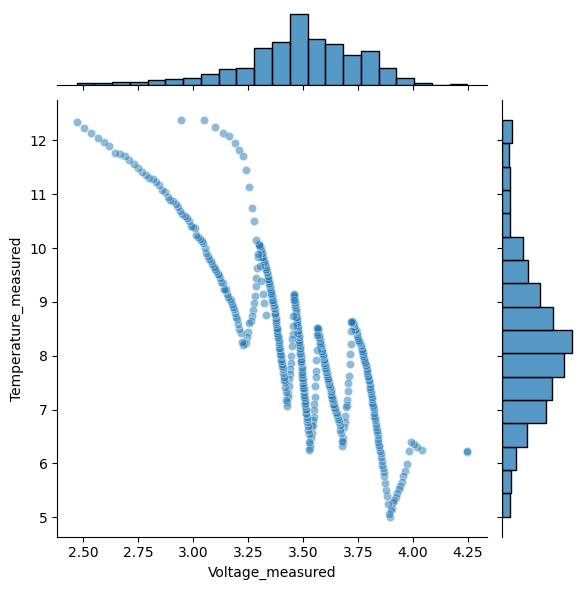

In [ ]:
#EDA
sns.jointplot(x='Voltage_measured', y='Temperature_measured', data=train_df, alpha=0.5)#alpha = 0.5, as in your example, means the points are semi-transparent, making it easier to visualize overlapping points.

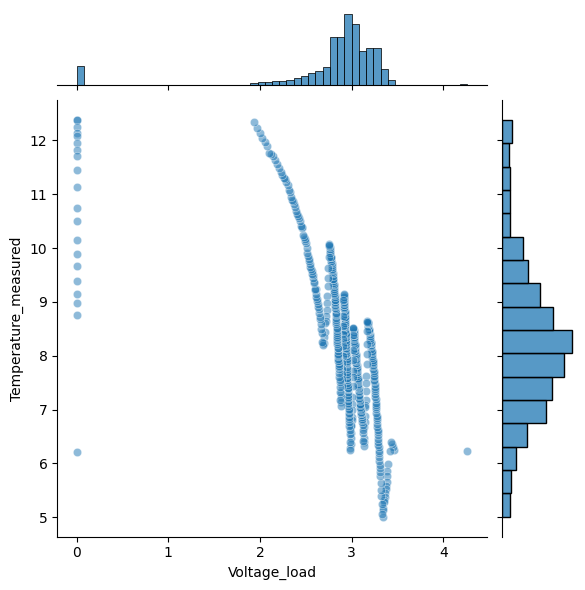

In [ ]:
sns.jointplot(x='Voltage_load', y='Temperature_measured', data=train_df, alpha=0.5)

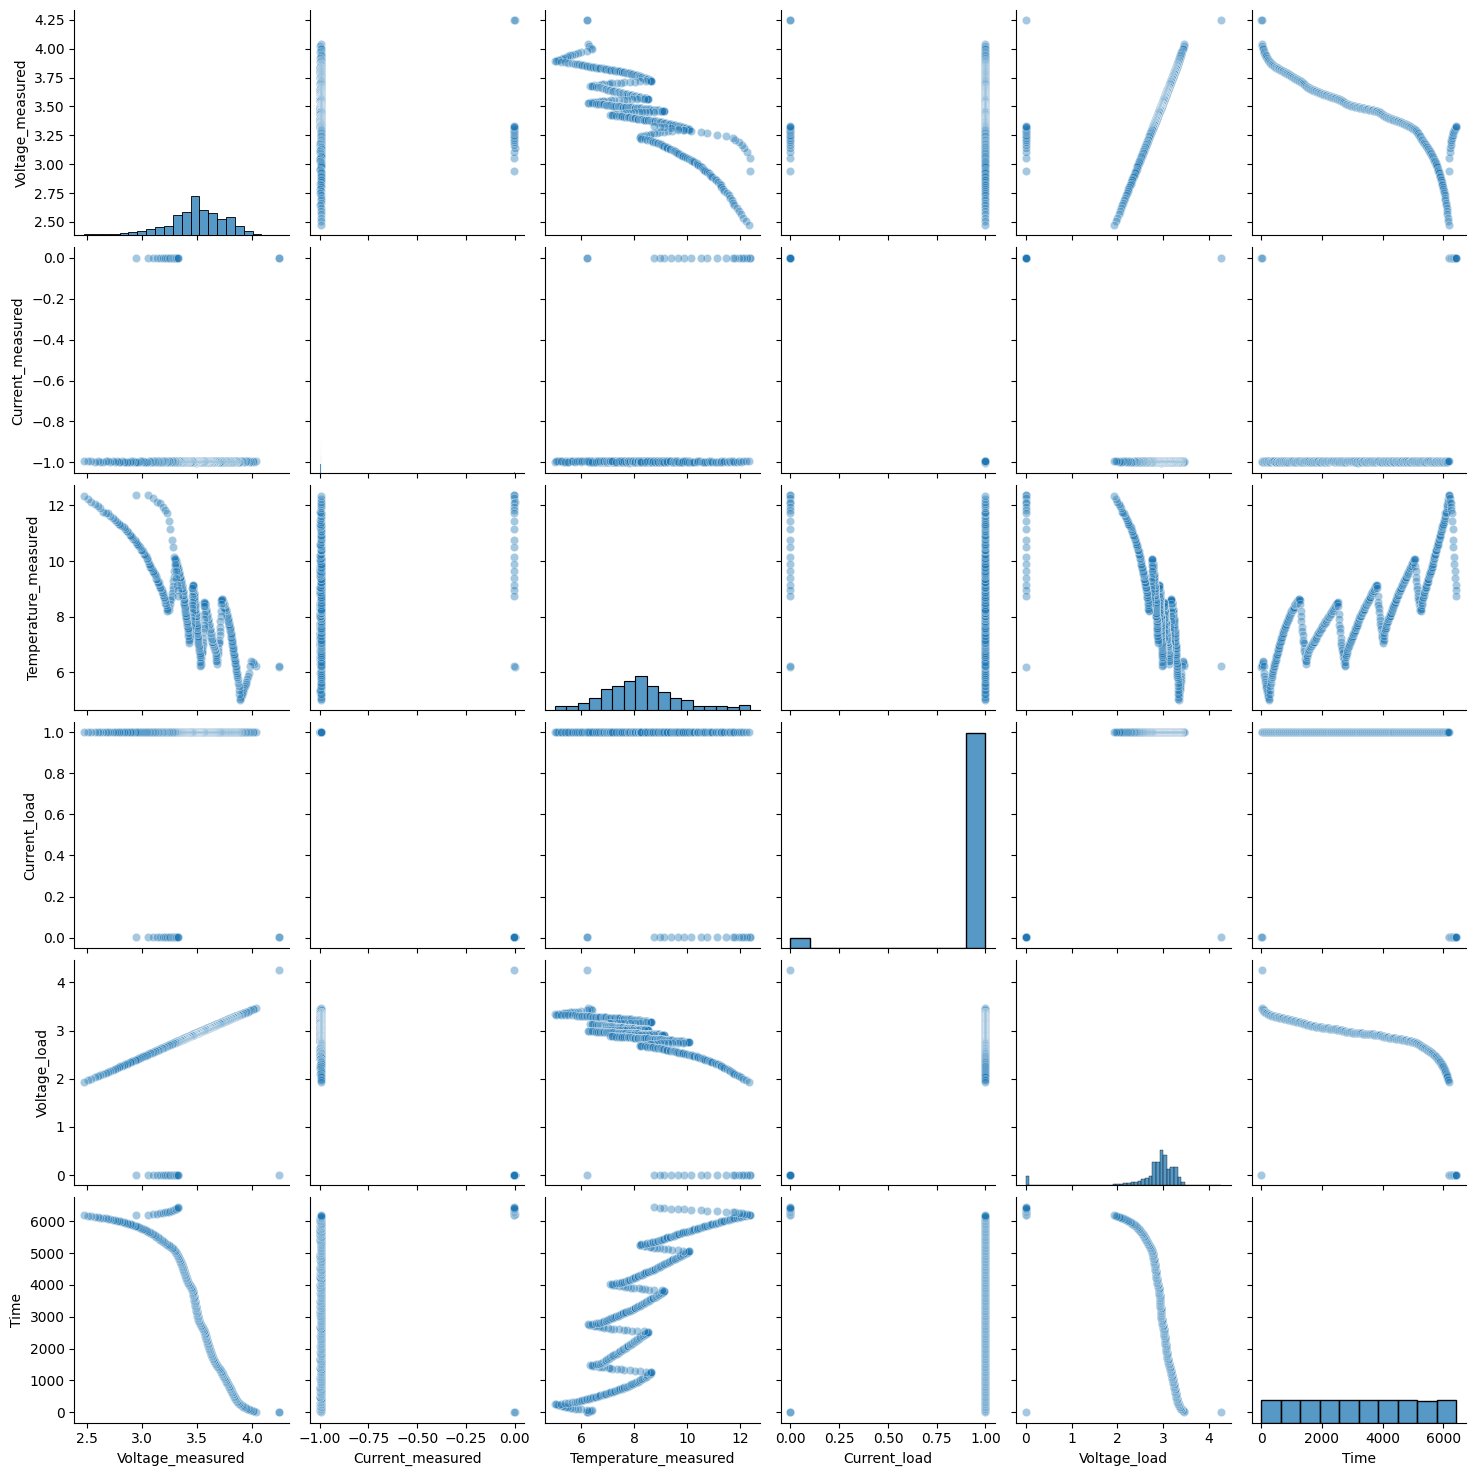

In [ ]:
sns.pairplot(train_df, kind='scatter',plot_kws={'alpha':0.4})

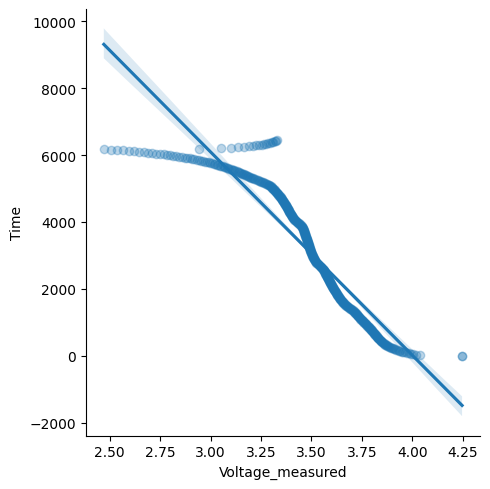

In [ ]:
#sns.lmplot(x='Voltage_measured', y='Current_measured', data=train_df, hue='Temperature_measured', fit_reg=False)
sns.lmplot(x='Voltage_measured', y='Time', data=train_df, scatter_kws={'alpha':0.3})

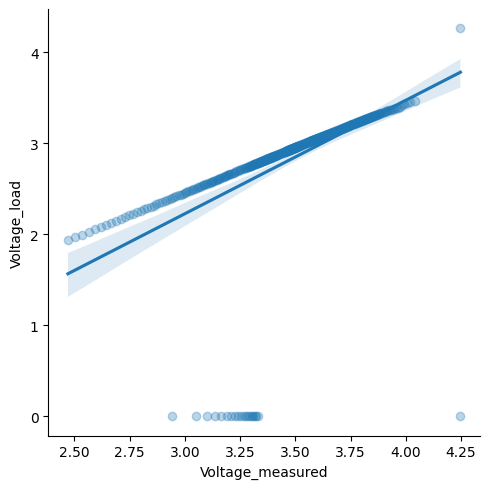

In [ ]:
sns.lmplot(x='Voltage_measured', y='Voltage_load', data=train_df, scatter_kws={'alpha':0.3})

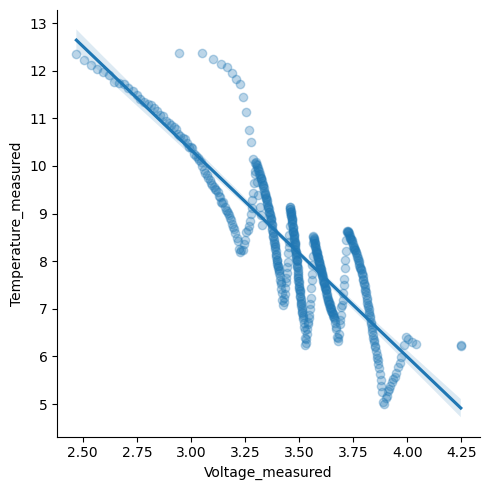

In [ ]:
sns.lmplot(x='Voltage_measured', y='Temperature_measured', data=train_df, scatter_kws={'alpha':0.3})#x='Temperature_measured', y='Voltage_measured'

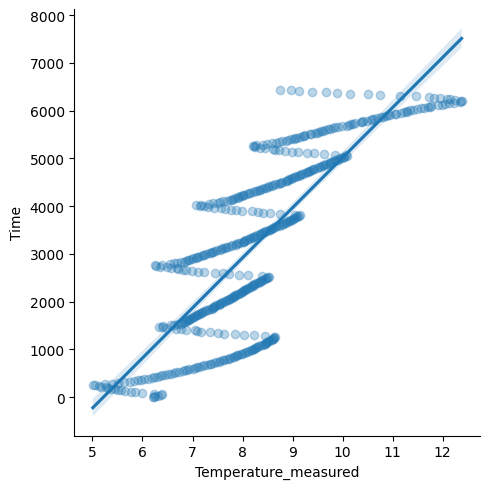

In [ ]:
sns.lmplot(x='Temperature_measured', y='Time', data=train_df, scatter_kws={'alpha':0.3})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=train_df.drop('Resistance_calculated',axis=1)
y=train_df['Resistance_calculated']

In [ ]:
x=train_df[['Voltage_load','Voltage_measured', 'Current_measured', 'Temperature_measured']]
#x=train_df[['Voltage_load','Voltage_measured','Temperature_measured']]

y=train_df[['Time']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#101

In [ ]:
y_test#x_train,x_test..

,Time
452,5938.672
84,1097.563
434,5700.406
473,6219.719
428,5621.047
...,...
5,62.813
116,1516.610
45,586.813
16,207.110


In [ ]:
#training the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm =LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
lm.coef_##Current -값이라서 수정해야 함??

array([[  -94.06364104, -5962.9501246 ,  1321.79327985,   -16.8240673 ]])

In [ ]:
cdf =pd.DataFrame(lm.coef_, x.columns, columns=['Coef'])
print(cdf)

ValueError: Shape of passed values is (1, 4), indices imply (4, 1)

In [ ]:
cdf = pd.DataFrame(lm.coef_.reshape(-1, 1), index=x.columns, columns=['Coef'])
print(cdf)

                             Coef
Voltage_load           -94.063641
Voltage_measured     -5962.950125
Current_measured      1321.793280
Temperature_measured   -16.824067


In [ ]:
cdf=pd.DataFrame(lm.coef_.reshape(-1,1),x.columns,columns=['Coef'])
print(cdf)

                             Coef
Voltage_load           -94.063641
Voltage_measured     -5962.950125
Current_measured      1321.793280
Temperature_measured   -16.824067


In [ ]:
#predictions

In [ ]:
predictions=lm.predict(x_test)

In [ ]:
predictions

array([[6844.70664946],
       [1518.72952187],
       [5771.75901369],
       [6911.10414326],
       [5523.34621636],
       [3540.14814868],
       [ 897.81498844],
       [2945.09209821],
       [5841.4622076 ],
       [3003.44199493],
       [ 295.49756268],
       [2103.89129152],
       [5306.14581516],
       [2754.49259925],
       [3907.71013833],
       [1350.27936542],
       [5603.81534798],
       [5646.35273352],
       [3942.85026366],
       [2868.28132654],
       [1448.79149289],
       [2540.56197163],
       [5376.28212308],
       [1178.59435034],
       [1422.11930893],
       [1436.82793313],
       [2358.81707089],
       [3140.36061486],
       [3167.47656543],
       [4137.18453885],
       [1732.73769747],
       [2123.34687618],
       [3559.40999196],
       [3623.06807986],
       [ 938.79356779],
       [1387.37199116],
       [ 183.6336045 ],
       [ 385.36888918],
       [2998.91999917],
       [2612.57842155],
       [4723.8467276 ],
       [4384.615

In [ ]:
#sns.scatterplot(x=y_test,y=predictions)
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Evalueation of our LM model')

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
# Reshape predictions and y_test to 1-dimensional arrays
predictions = predictions.reshape(-1)
y_test = y_test.reshape(-1)  # Assuming y_test is a numpy array or can be converted to one

sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Evalueation of our LM model')

AttributeError: 'DataFrame' object has no attribute 'reshape'

Text(0, 0.5, 'Evalueation of our LM model')

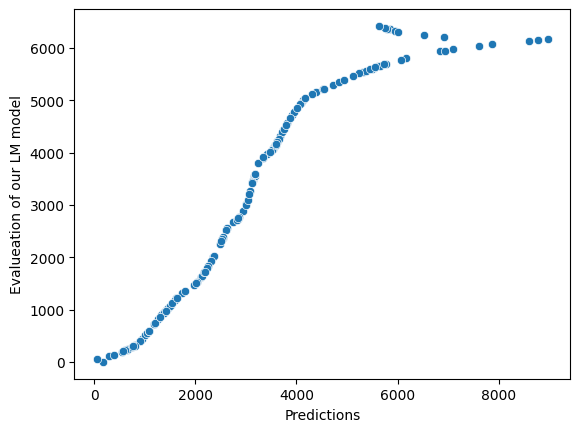

In [ ]:
# Reshape predictions and y_test to 1-dimensional arrays
predictions = predictions.reshape(-1)
y_test_values = y_test.values.reshape(-1)  # Extract values from DataFrame and reshape

sns.scatterplot(x=predictions, y=y_test_values)  # Use the reshaped values for plotting
plt.xlabel('Predictions')
plt.ylabel('Evalueation of our LM model')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [ ]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ', mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_test,predictions)))
print('RMSE: ', math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  492.42974925219494
Mean Squared Error:  409901.79468985065
Root Mean Squared Error:  640.2357336870933
RMSE:  640.2357336870933


In [ ]:
#residualds

In [ ]:
residuals = y_test['Time'] - predictions#residuals = y_test - predictions

In [ ]:
residuals

,Time
452,-906.034649
84,-421.166522
434,-71.353014
473,-691.385143
428,97.700784
...,...
5,7.777676
116,-494.946058
45,-490.702749
16,-371.247489


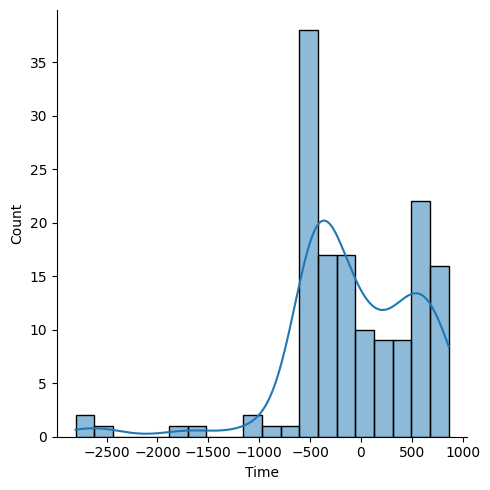

In [ ]:
sns.displot(residuals,bins=20,kde=True)

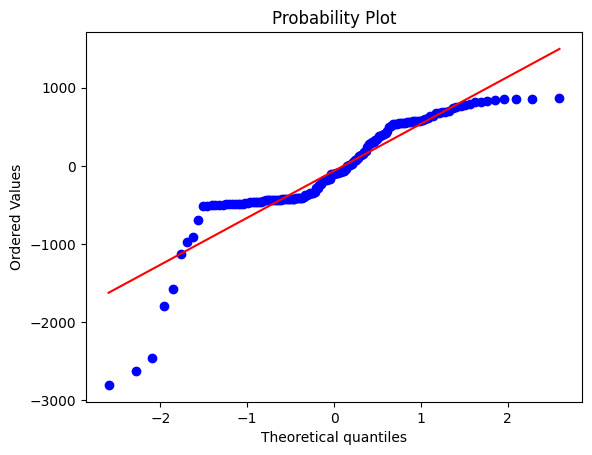

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

In [ ]:
train_df.shape

(409, 6)

In [ ]:
train_df['Voltage_measured'].value_counts(normalize=True) #proportion:비율

,proportion
Voltage_measured,
4.181797,0.002445
3.372449,0.002445
3.350669,0.002445
3.352439,0.002445
3.354556,0.002445
...,...
3.579054,0.002445
3.580269,0.002445
3.581648,0.002445


In [ ]:
train_df.columns

Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_load', 'Voltage_load', 'Time'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

,0
Voltage_measured,0
Current_measured,0
Temperature_measured,0
Current_load,0
Voltage_load,0
Time,0


In [ ]:
# Step 1: Extract the 'Voltage_measured' column
voltage_data = train_df[['Voltage_measured']]  # Double brackets for DataFrame

# Step 2: Initialize MinMaxScaler
scaler = MinMaxScaler()

# Step 3: Fit and transform the 'Voltage_measured' column
train_df['Voltage_measured_scaled'] = scaler.fit_transform(voltage_data)

# Step 4: Display the first few rows to check the result
print(train_df[['Voltage_measured', 'Voltage_measured_scaled']].head())

   Voltage_measured  Voltage_measured_scaled
0          4.181797                 1.000000
1          4.181439                 0.999789
2          3.995242                 0.890182
3          3.975280                 0.878431
4          3.960087                 0.869487


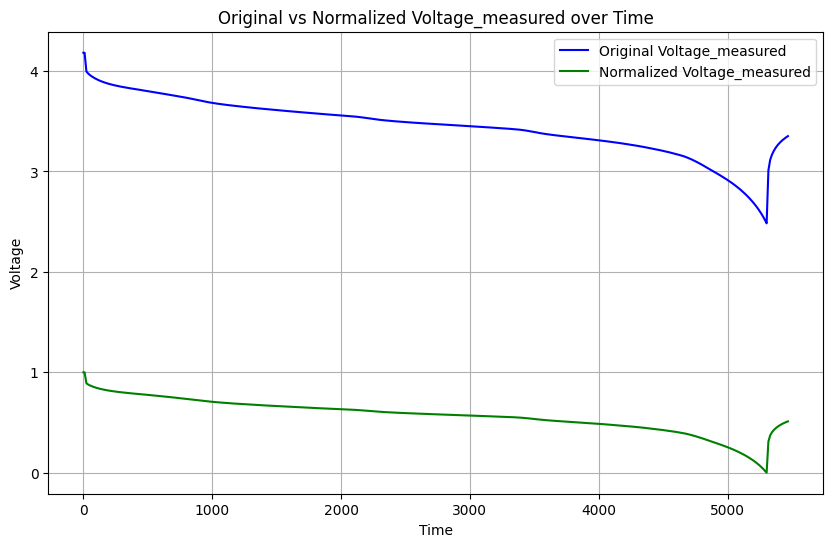

In [ ]:
#그래프화
# Step 1: Plot original vs. normalized 'Voltage_measured' data
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(train_df['Time'], train_df['Voltage_measured'], label='Original Voltage_measured', color='blue')

# Plot normalized data
plt.plot(train_df['Time'], train_df['Voltage_measured_scaled'], label='Normalized Voltage_measured', color='green')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Original vs Normalized Voltage_measured over Time')#'Original vs Normalized Voltage_measured over Time'
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Voltage_measured         409 non-null    float64
 1   Current_measured         409 non-null    float64
 2   Temperature_measured     409 non-null    float64
 3   Current_load             409 non-null    float64
 4   Voltage_load             409 non-null    float64
 5   Time                     409 non-null    float64
 6   Voltage_measured_scaled  409 non-null    float64
dtypes: float64(7)
memory usage: 22.5 KB


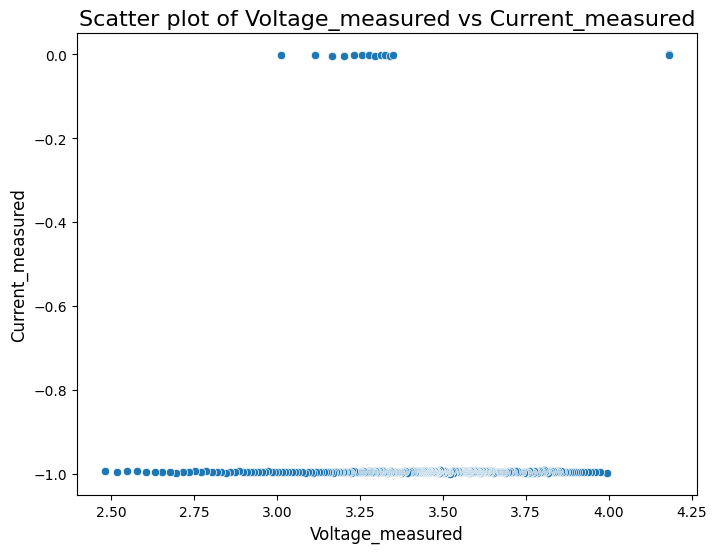

In [ ]:
#Voltage_measured 와 Current_measured  상관관계를 시각적으로 확인
import matplotlib.pyplot as plt
import seaborn as sns

# 산포도를 그리다
plt.figure(figsize=(8,6))
sns.scatterplot(x='Voltage_measured', y='Current_measured', data=train_df)

# 그래프의 제목과 라벨
plt.title('Scatter plot of Voltage_measured vs Current_measured', fontsize=16)
plt.xlabel('Voltage_measured', fontsize=12)
plt.ylabel('Current_measured', fontsize=12)

# 그래프 표시
plt.show()


In [ ]:
#데이터 스케일링 및 정규화 검토
#데이터가 적절하게 스케일되지 않은 경우 특징량 간의 관계가 제대로 반영되지 않을 수 있습니다.
#전압과 전류의 범위가 크게 다른 경우 데이터 스케일링이나 정규화를 시도함으로써 상관관계를 보다 명확하게 표시할 수 있을지도 모릅니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[['Voltage_measured', 'Current_measured']] = scaler.fit_transform(train_df[['Voltage_measured', 'Current_measured']])

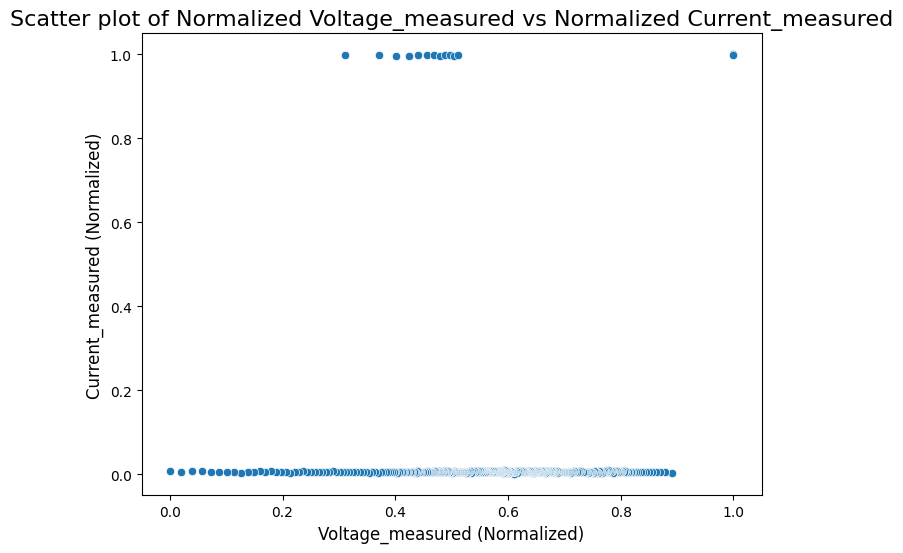

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Maxスケーリングを実行
min_max_scaler = MinMaxScaler()
normalized_features = min_max_scaler.fit_transform(train_df[['Voltage_measured', 'Current_measured']])

# 正規化されたデータを新しいDataFrameに保存
normalized_df = pd.DataFrame(normalized_features, columns=['Voltage_measured_normalized', 'Current_measured_normalized'])

# 正規化されたデータで散布図を作成
plt.figure(figsize=(8,6))
sns.scatterplot(x='Voltage_measured_normalized', y='Current_measured_normalized', data=normalized_df)

# グラフのタイトルとラベル
plt.title('Scatter plot of Normalized Voltage_measured vs Normalized Current_measured', fontsize=16)
plt.xlabel('Voltage_measured (Normalized)', fontsize=12)
plt.ylabel('Current_measured (Normalized)', fontsize=12)

# グラフの表示
plt.show()


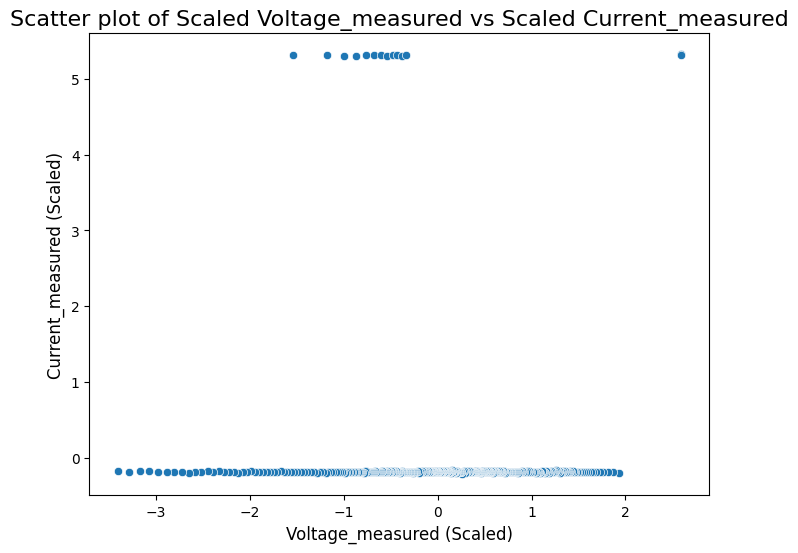

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# スケーリングを実行
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df[['Voltage_measured', 'Current_measured']])

# スケーリングされたデータを新しいDataFrameに保存
scaled_df = pd.DataFrame(scaled_features, columns=['Voltage_measured_scaled', 'Current_measured_scaled'])

# スケーリングされたデータで散布図を作成
plt.figure(figsize=(8,6))
sns.scatterplot(x='Voltage_measured_scaled', y='Current_measured_scaled', data=scaled_df)

# グラフのタイトルとラベル
plt.title('Scatter plot of Scaled Voltage_measured vs Scaled Current_measured', fontsize=16)
plt.xlabel('Voltage_measured (Scaled)', fontsize=12)
plt.ylabel('Current_measured (Scaled)', fontsize=12)

# グラフの表示
plt.show()


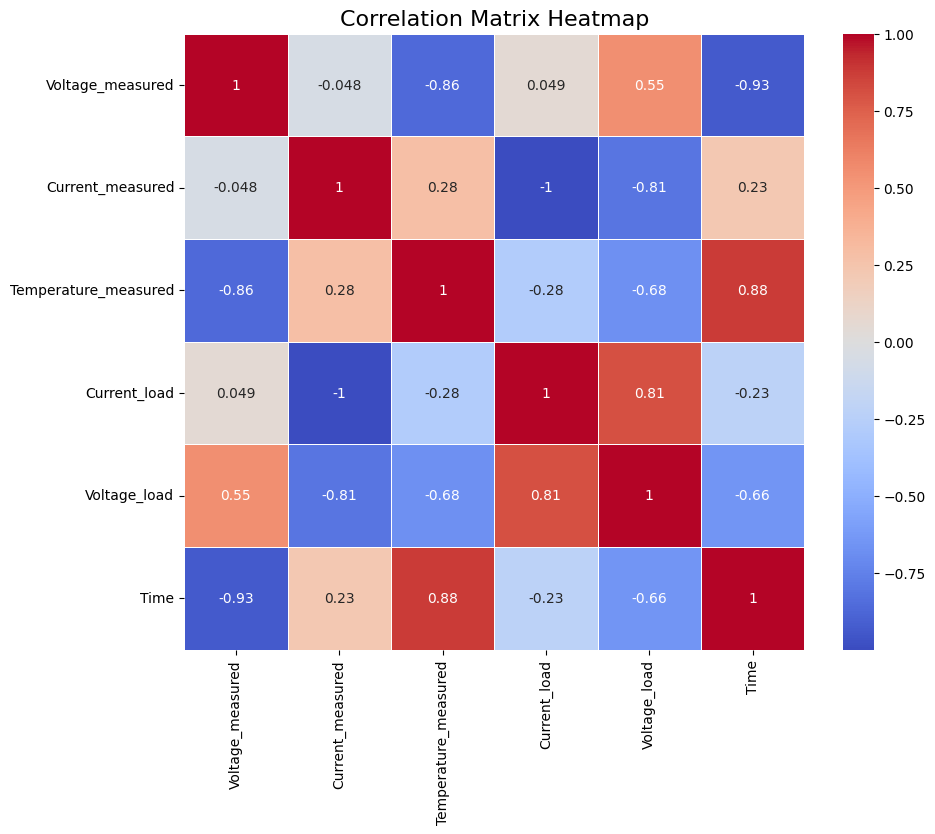

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 相関行列を計算
correlation_matrix = train_df.corr()

# ヒートマップを作成
plt.figure(figsize=(10,8))  # 図のサイズを指定
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# ヒートマップのタイトルと表示
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


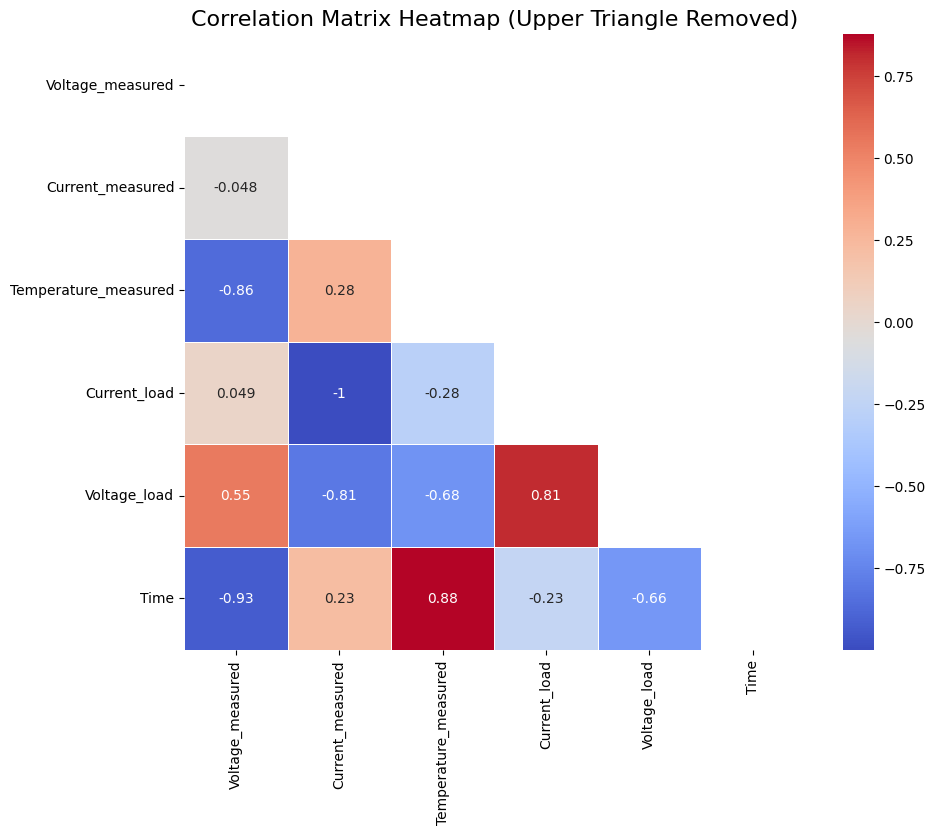

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 相関行列を計算
correlation_matrix = train_df.corr()

# マスクを作成：対角線より上の部分をマスクする
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# ヒートマップを作成
plt.figure(figsize=(10,8))  # 図のサイズを指定
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)

# ヒートマップのタイトルと表示
plt.title('Correlation Matrix Heatmap (Upper Triangle Removed)', fontsize=16)
plt.show()


# 전처리

In [ ]:
import seaborn as sns
import pandas as pd
#Battery021 = sns.load_dataset('00021.csv')
Battery021 = pd.read_csv('00021.csv')
print(Battery021.shape)
print(Battery021.head())

(409, 6)
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.181797         -0.000611              5.292800        0.0004   
1          4.181439         -0.001548              5.302113        0.0004   
2          3.995242         -0.997240              5.363127        1.0000   
3          3.975280         -0.996329              5.430136        1.0000   
4          3.960087         -0.996098              5.496547        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.197   9.390  
2         3.453  23.531  
3         3.424  36.921  
4         3.336  50.296  


In [ ]:
#High Voltage High Current High Temp
Battery021['HV,HC,HT']=

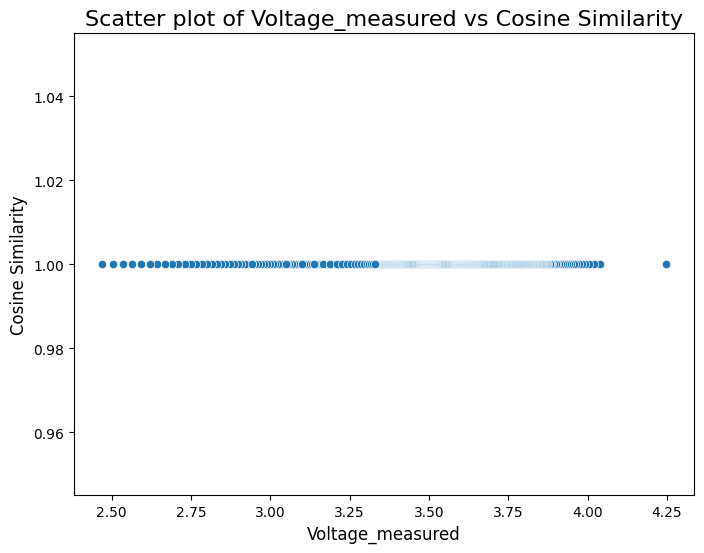

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Voltage_measured と Current_measured を正規化
normalized_values = normalize(train_df[['Voltage_measured', 'Current_measured']])

# 各行の Voltage_measured と Current_measured のコサイン類似度を計算
cosine_similarity_values = np.array([np.dot(row, row) for row in normalized_values])

# コサイン類似度を新しい DataFrame に保存
cosine_df = pd.DataFrame({
    'Cosine_Similarity': cosine_similarity_values,
    'Voltage_measured': train_df['Voltage_measured'],
    'Current_measured': train_df['Current_measured']
})

# 散布図を作成
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Voltage_measured', y='Cosine_Similarity', data=cosine_df)

# グラフのタイトルとラベル
plt.title('Scatter plot of Voltage_measured vs Cosine Similarity', fontsize=16)
plt.xlabel('Voltage_measured', fontsize=12)
plt.ylabel('Cosine Similarity', fontsize=12)

# グラフの表示
plt.show()


#시간 변화에 따라 특칭
1. 전압/전류의 평균값을 구하기

In [ ]:
import pandas as pd

# 例としてのデータフレームを作成
# サイクル識別のために 'Cycle' 列があり、それぞれのサイクルごとの 'Voltage_measured' と 'Current_measured' を記録していると仮定
data = {
    'Cycle': [1, 1, 1, 2, 2, 2, 3, 3, 3],  # サイクル番号
    'Voltage_measured': [3.6, 3.65, 3.7, 3.7, 3.68, 3.66, 3.7, 3.75, 3.72],
    'Current_measured': [1.2, 1.3, 1.25, 1.1, 1.15, 1.2, 1.3, 1.35, 1.32]
}
df = pd.DataFrame(data)

# サイクルごとの平均電圧と平均電流を計算
cycle_means = df.groupby('Cycle').mean().reset_index()

print(cycle_means)


   Cycle  Voltage_measured  Current_measured
0      1          3.650000          1.250000
1      2          3.680000          1.150000
2      3          3.723333          1.323333


#AI모델

#

In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 평균 전압을 저장할 리스트
cycle_averages = []

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_mean = df['Voltage_measured'].mean()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장
    cycle_averages.append({'test_id': test_id, 'voltage_mean': voltage_mean})

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_averages)

# test_id로 정렬하여 출력
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)
print(result_df)


    test_id  voltage_mean
0         1      3.475266
1         5      3.476559
2         7      3.470767
3         9      3.467551
4        11      3.462839
..      ...           ...
64      173      3.390089
65      175      3.391989
66      177      3.386240
67      179      3.383817
68      181      3.381885

[69 rows x 2 columns]


In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 평균 전압을 저장할 리스트
cycle_averages = []

# Cycle 값을 추적하기 위한 변수
cycle_counter = 1

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_mean = df['Voltage_measured'].mean()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장
    cycle_averages.append({'test_id': test_id, 'Cycle': cycle_counter, 'voltage_mean': voltage_mean})

    # Cycle 값을 1 증가
    cycle_counter += 1

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_averages)

# test_id로 정렬하여 출력
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)
print(result_df)

    test_id  Cycle  voltage_mean
0         1     54      3.475266
1         5      5      3.476559
2         7     41      3.470767
3         9     24      3.467551
4        11     63      3.462839
..      ...    ...           ...
64      173      4      3.390089
65      175     44      3.391989
66      177      1      3.386240
67      179     43      3.383817
68      181     59      3.381885

[69 rows x 3 columns]


#최대 전압

In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 최대 전압을 저장할 리스트
cycle_max = []

# Cycle 값을 추적하기 위한 변수
cycle_counter = 1

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_max = df['Voltage_measured'].max()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장
    cycle_max.append({'test_id': test_id, 'Cycle': cycle_counter, 'voltage_max': voltage_max})

    # Cycle 값을 1 증가
    cycle_counter += 1

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_max)

# test_id로 정렬하여 출력
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)
print(result_df)

    test_id  Cycle  voltage_max
0         1     61     4.246764
1         5     56     4.186636
2         7     15     4.199923
3         9     13     4.199569
4        11     23     4.199397
..      ...    ...          ...
64      173     62     4.175112
65      175     24     4.195169
66      177     38     4.194828
67      179     47     4.194470
68      181      9     4.194180

[69 rows x 3 columns]


SOH

In [1]:
import pandas as pd

# CSV 파일을 불러옵니다.
file_path = '/content/Battery_Cap_B0005.csv'  # 파일 경로로 변경
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열만 출력
result_df = df[['test_id', 'Cycle', 'Capacity', 'SOH']]
print(result_df)

     test_id  Cycle  Capacity         SOH
0          1      1  1.856487  100.000000
1          3      2  1.846327   99.452721
2          5      3  1.835349   98.861386
3          7      4  1.835263   98.856718
4          9      5  1.834646   98.823482
..       ...    ...       ...         ...
163      599    164  1.293464   69.672630
164      603    165  1.288003   69.378514
165      607    166  1.287453   69.348842
166      611    167  1.309015   70.510328
167      613    168  1.325079   71.375616

[168 rows x 4 columns]


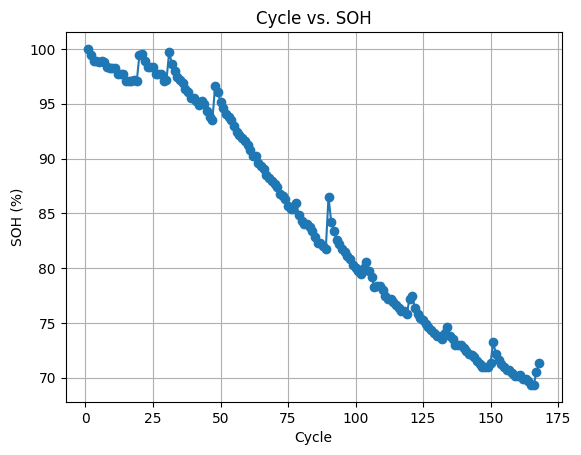

In [2]:
import matplotlib.pyplot as plt

# Cycle과 SOH를 사용하여 그래프를 그립니다.
plt.plot(result_df['Cycle'], result_df['SOH'], marker='o')

# 그래프 제목과 축 레이블을 설정합니다.
plt.title('Cycle vs. SOH')
plt.xlabel('Cycle')
plt.ylabel('SOH (%)')

# 그래프를 표시합니다.
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# CSV 파일을 불러옵니다.
file_path = '/content/metadata.csv'  # 파일 경로로 변경
df = pd.read_csv(file_path)

# battery_id 열의 요소별 개수 출력
battery_counts = df['battery_id'].value_counts()

# 결과 출력
print(battery_counts)


battery_id
B0007    616
B0005    616
B0006    616
B0033    486
B0036    486
B0034    486
B0018    319
B0044    275
B0043    275
B0042    275
B0054    253
B0056    252
B0055    252
B0047    184
B0048    184
B0045    184
B0046    184
B0041    163
B0053    137
B0040    122
B0039    122
B0038    122
B0030     97
B0029     97
B0031     97
B0032     97
B0026     80
B0025     80
B0028     80
B0027     80
B0049     62
B0052     62
B0051     62
B0050     62
Name: count, dtype: int64


In [ ]:
import pandas as pd

# CSV 파일을 불러옵니다.
file_path = '/content/metadata.csv'  # 파일 경로로 변경
df = pd.read_csv(file_path)

# 'type' 열이 'Discharge'인 경우에만 필터링
discharge_df = df[df['type'] == 'discharge']

# 'battery_id' 열의 요소별 개수 출력
battery_counts = discharge_df['battery_id'].value_counts()

# 결과 출력
print(battery_counts)


battery_id
B0033    197
B0036    197
B0034    197
B0007    168
B0005    168
B0006    168
B0018    132
B0044    112
B0043    112
B0042    112
B0054    103
B0056    102
B0055    102
B0047     72
B0048     72
B0045     72
B0046     72
B0041     67
B0053     56
B0040     47
B0039     47
B0038     47
B0030     40
B0029     40
B0031     40
B0032     40
B0026     28
B0025     28
B0028     28
B0027     28
B0049     25
B0052     25
B0051     25
B0050     25
Name: count, dtype: int64


In [ ]:
import pandas as pd

# CSV 파일을 불러옵니다.
file_path = '/content/metadata.csv'  # 파일 경로로 변경
df0 = pd.read_csv(file_path)

# battery_id 열의 요소별 개수 출력
battery_counts = df['battery_id'].value_counts()

# 결과 출력
print(battery_counts)


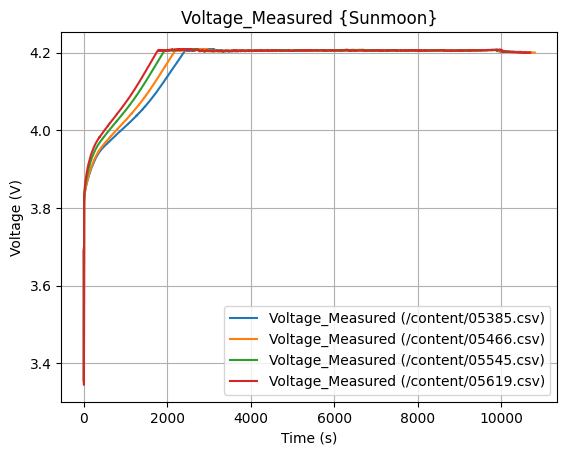

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
file_paths = [
    '/content/05385.csv',  # 1つ目のファイル
    '/content/05466.csv',  # 2つ目のファイル
    '/content/05545.csv',  # 3つ目のファイル
    '/content/05619.csv'   # 4つ目のファイル
]

# 各CSVファイルを読み込んで処理
for file_path in file_paths:
    # CSVファイルを読み込む
    df = pd.read_csv(file_path)

    # グラフの作成
    plt.plot(df['Time'], df['Voltage_measured'], label=f'Voltage_Measured ({file_path})')

# グラフの詳細設定
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage_Measured {Sunmoon}')
plt.legend()
plt.grid(True)

# グラフの表示
plt.show()


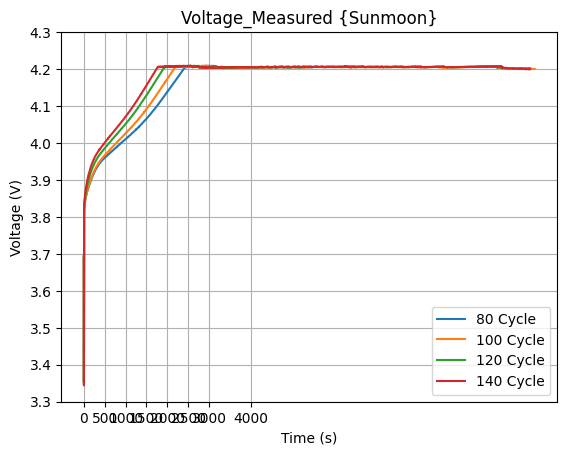

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일의 경로
file_paths = [
    '/content/05385.csv',  # 1번째 파일
    '/content/05466.csv',  # 2번째 파일
    '/content/05545.csv',  # 3번째 파일
    '/content/05619.csv'   # 4번째 파일
]

# 각 CSV 파일을 읽고 처리
labels = ['80 Cycle', '100 Cycle', '120 Cycle', '140 Cycle']  # 라벨

for i, file_path in enumerate(file_paths):
    # CSV 파일을 읽기
    df = pd.read_csv(file_path)

    # 그래프 생성
    plt.plot(df['Time'], df['Voltage_measured'], label=labels[i])

# 그래프의 상세 설정
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage_Measured {Sunmoon}')
plt.legend()
plt.grid(True)

# x축 눈금 조정
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 4000])

# y축 눈금 설정 (3.3에서 4.3까지)
plt.yticks([3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3])

# 그래프 표시
plt.show()


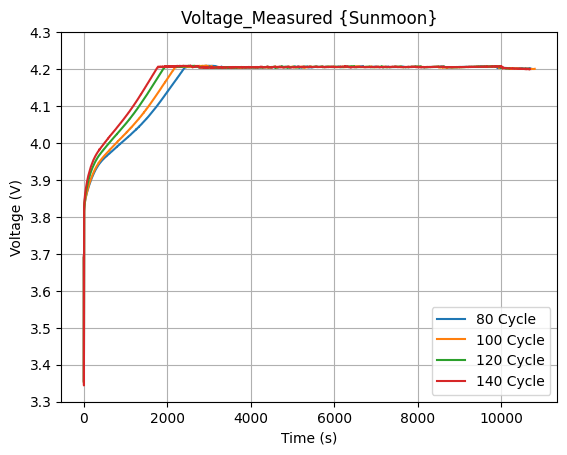

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일의 경로
file_paths = [
    '/content/05385.csv',  # 1번째 파일
    '/content/05466.csv',  # 2번째 파일
    '/content/05545.csv',  # 3번째 파일
    '/content/05619.csv'   # 4번째 파일
]

# 각 CSV 파일을 읽고 처리
labels = ['80 Cycle', '100 Cycle', '120 Cycle', '140 Cycle']  # 라벨

for i, file_path in enumerate(file_paths):
    # CSV 파일을 읽기
    df = pd.read_csv(file_path)

    # 그래프 생성
    plt.plot(df['Time'], df['Voltage_measured'], label=labels[i])

# 그래프의 상세 설정
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage_Measured {Sunmoon}')
plt.legend()
plt.grid(True)

# y축 눈금 설정 (3.3에서 4.3까지)
plt.yticks([3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3])

# 그래프 표시
plt.show()


In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '/content/05385.csv'

# CSV 파일을 읽기
df = pd.read_csv(file_path)

# 마지막 5개의 데이터 확인
print(df.tail())


      Voltage_measured  Current_measured  Temperature_measured  \
3828          4.201299         -0.000479             24.478407   
3829          4.201196         -0.001489             24.475710   
3830          4.201341         -0.003974             24.478712   
3831          4.201195         -0.002094             24.481815   
3832          4.200912          0.001223             24.476494   

      Current_charge  Voltage_charge       Time  
3828          -0.002           0.003  10708.094  
3829           0.000           0.003  10710.828  
3830           0.000           0.003  10713.547  
3831           0.000           0.003  10716.281  
3832          -0.002           0.003  10719.016  


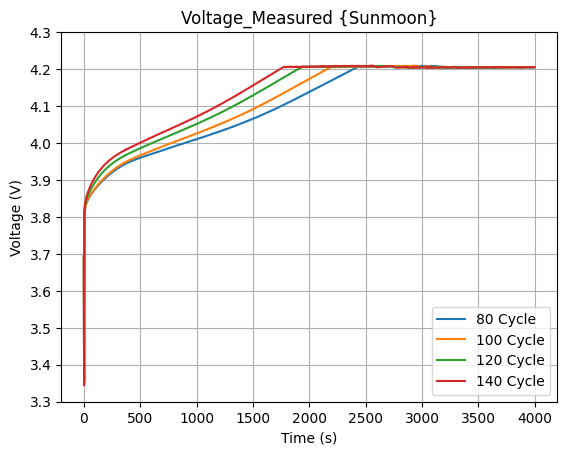

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일의 경로
file_paths = [
    '/content/05385.csv',  # 1번째 파일
    '/content/05466.csv',  # 2번째 파일
    '/content/05545.csv',  # 3번째 파일
    '/content/05619.csv'   # 4번째 파일
]

# 각 CSV 파일을 읽고 처리
labels = ['80 Cycle', '100 Cycle', '120 Cycle', '140 Cycle']  # 라벨

for i, file_path in enumerate(file_paths):
    # CSV 파일을 읽기
    df = pd.read_csv(file_path)

    # 'Time' 값이 4000 이하인 데이터만 필터링
    df_filtered = df[df['Time'] <= 4000]

    # 그래프 생성
    plt.plot(df_filtered['Time'], df_filtered['Voltage_measured'], label=labels[i])

# 그래프의 상세 설정
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage_Measured {Sunmoon}')
plt.legend()
plt.grid(True)

# y축 눈금 설정 (3.3에서 4.3까지)
plt.yticks([3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3])

# 그래프 표시
plt.show()


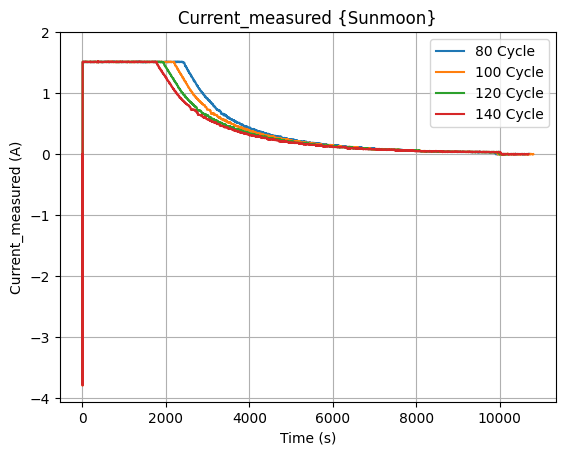

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일의 경로
file_paths = [
    '/content/05385.csv',  # 1번째 파일
    '/content/05466.csv',  # 2번째 파일
    '/content/05545.csv',  # 3번째 파일
    '/content/05619.csv'   # 4번째 파일
]

# 각 CSV 파일을 읽고 처리
labels = ['80 Cycle', '100 Cycle', '120 Cycle', '140 Cycle']  # 라벨

for i, file_path in enumerate(file_paths):
    # CSV 파일을 읽기
    df = pd.read_csv(file_path)

    # 그래프 생성
    plt.plot(df['Time'], df['Current_measured'], label=labels[i])

# 그래프의 상세 설정
plt.xlabel('Time (s)')
plt.ylabel('Current_measured (A)')
plt.title('Current_measured {Sunmoon}')
plt.legend()
plt.grid(True)

# y축 눈금 설정 (A:-4에서 2까지)
plt.yticks([-4, -3, -2, -1, 0, 1, 2,])

# 그래프 표시
plt.show()


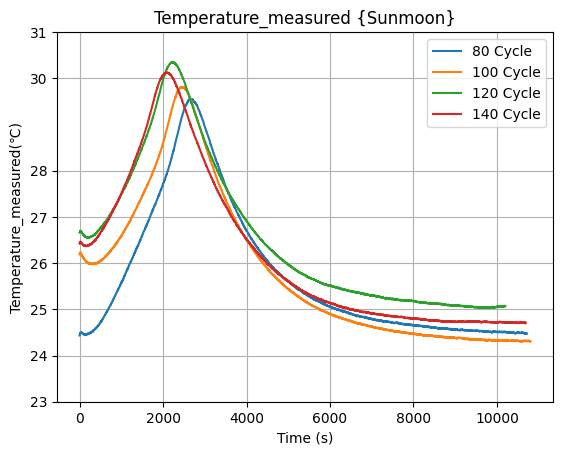

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일의 경로
file_paths = [
    '/content/05385.csv',  # 1번째 파일
    '/content/05466.csv',  # 2번째 파일
    '/content/05545.csv',  # 3번째 파일
    '/content/05619.csv'   # 4번째 파일
]

# 각 CSV 파일을 읽고 처리
labels = ['80 Cycle', '100 Cycle', '120 Cycle', '140 Cycle']  # 라벨

for i, file_path in enumerate(file_paths):
    # CSV 파일을 읽기
    df = pd.read_csv(file_path)

    # 그래프 생성
    plt.plot(df['Time'], df['Temperature_measured'], label=labels[i])

# 그래프의 상세 설정
plt.xlabel('Time (s)')
plt.ylabel('Temperature_measured(℃)')
plt.title('Temperature_measured {Sunmoon}')
plt.legend()
plt.grid(True)

# y축 눈금 설정 (℃:23에서 31까지)
plt.yticks([23, 24, 25, 26, 27, 28, 30, 31,])

# 그래프 표시
plt.show()


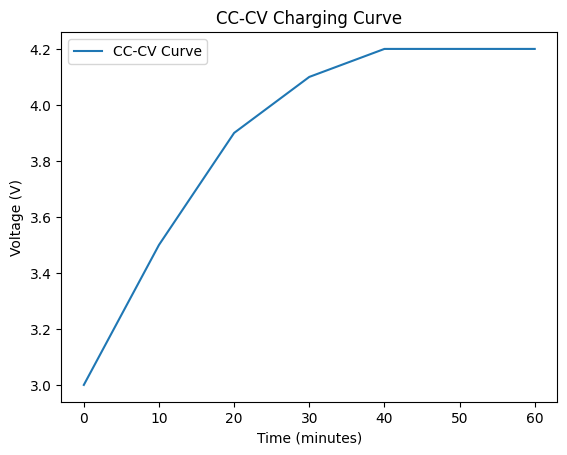

In [ ]:
import matplotlib.pyplot as plt

# 예제 데이터 (충전 시간에 따른 전압)
time = [0, 10, 20, 30, 40, 50, 60]
voltage = [3.0, 3.5, 3.9, 4.1, 4.2, 4.2, 4.2]

plt.plot(time, voltage, label="CC-CV Curve")
plt.xlabel("Time (minutes)")
plt.ylabel("Voltage (V)")
plt.title("CC-CV Charging Curve")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 평균 전압을 저장할 리스트
cycle_max = []

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_max = df['Voltage_measured'].max()
    current_max = df['Current_measured'].max()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장 (Cycle은 나중에 추가)
    cycle_max.append({'test_id': test_id, 'voltage_max': voltage_mean,'current_max': current_max})

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_max)

# test_id로 정렬
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)

# Cycle 열 추가 (test_id의 행 번호 기준)
result_df['Cycle'] = result_df.index + 1

print(result_df)

    test_id  voltage_max  current_max  Cycle
0         1     4.151696     0.000252      1
1         5     4.151696    -0.001536      2
2         7     4.151696    -0.000746      3
3         9     4.151696     0.000303      4
4        11     4.151696     0.000422      5
..      ...          ...          ...    ...
64      173     4.151696    -0.000139     65
65      175     4.151696    -0.000513     66
66      177     4.151696     0.000474     67
67      179     4.151696    -0.000326     68
68      181     4.151696    -0.000239     69

[69 rows x 4 columns]


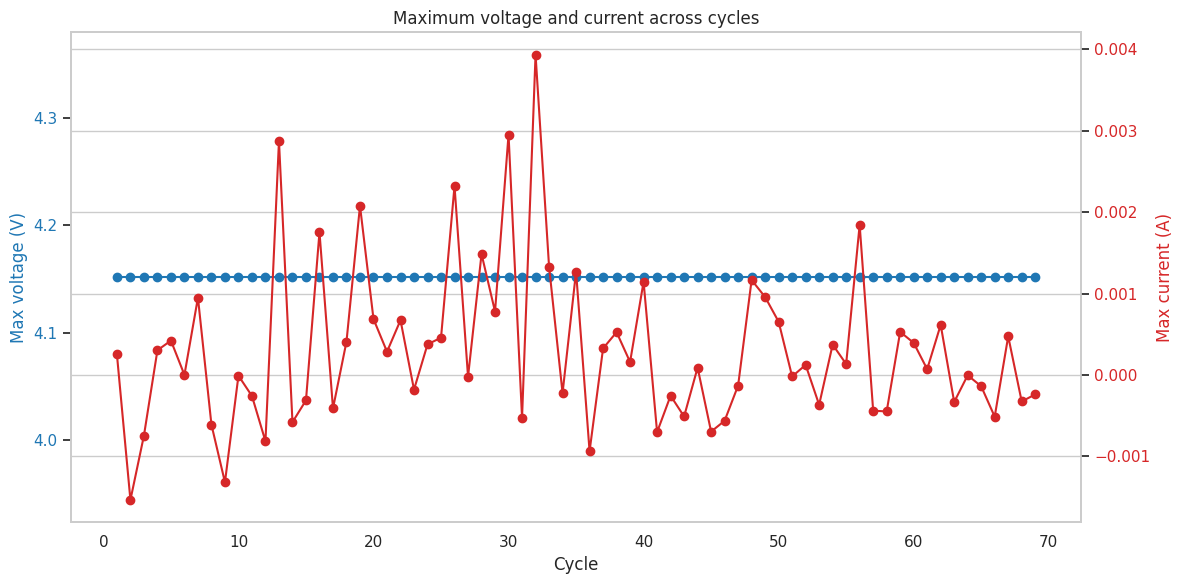

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# result_df가 이미 생성되었다고 가정합니다.

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 전압과 전류를 위한 두 개의 서브플롯을 가진 그림 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 평균 전압 플로팅
color = 'tab:blue'
ax1.set_xlabel('Cycle')  # X축 레이블
ax1.set_ylabel('Max voltage (V)', color=color)  # Y축 레이블
ax1.plot(result_df['Cycle'], result_df['voltage_max'], color=color, marker='o', label='Max voltage')
ax1.tick_params(axis='y', labelcolor=color)

# 평균 전류를 위한 두 번째 Y축 생성
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Max current (A)', color=color)  # Y축 레이블
ax2.plot(result_df['Cycle'], result_df['current_max'], color=color, marker='o', label='Max current')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 그리드 추가
plt.title('Maximum voltage and current across cycles')  # 그래프 제목
ax1.grid()

# 그래프 표시
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 평균 전압을 저장할 리스트
cycle_averages = []

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_mean = df['Voltage_measured'].mean()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장 (Cycle은 나중에 추가)
    cycle_averages.append({'test_id': test_id, 'voltage_mean': voltage_mean})

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_averages)

# test_id로 정렬
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)

# Cycle 열 추가 (test_id의 행 번호 기준)
result_df['Cycle'] = result_df.index + 1

print(result_df)

    test_id  voltage_mean  Cycle
0         1      3.475266      1
1         5      3.476559      2
2         7      3.470767      3
3         9      3.467551      4
4        11      3.462839      5
..      ...           ...    ...
64      173      3.390089     65
65      175      3.391989     66
66      177      3.386240     67
67      179      3.383817     68
68      181      3.381885     69

[69 rows x 3 columns]


In [ ]:
import pandas as pd
import glob
import os

# 데이터 폴더 경로를 지정
folder_path = '/content/sample_data/01_B0047_DisChrgeCycle/'  # 데이터 폴더의 경로로 변경
files = glob.glob(os.path.join(folder_path, '*.csv'))  # 폴더 내 모든 CSV 파일을 가져오기

# 평균 전압을 저장할 리스트
cycle_averages = []

# 각 파일에 대해 처리
for file in files:
    # 파일을 읽기
    df = pd.read_csv(file)

    # 전압의 평균을 계산 (예: Voltage_measured 열이 존재한다고 가정)
    voltage_mean = df['Voltage_measured'].mean()
    current_mean = df['Current_measured'].mean()

    # 파일 이름에서 test_id를 추출
    test_id = int(os.path.splitext(os.path.basename(file))[0])

    # 결과를 딕셔너리로 저장 (Cycle은 나중에 추가)
    cycle_averages.append({'test_id': test_id, 'voltage_mean': voltage_mean,'current_mean': current_mean})

# 리스트를 데이터프레임으로 변환
result_df = pd.DataFrame(cycle_averages)

# test_id로 정렬
result_df = result_df.sort_values(by='test_id').reset_index(drop=True)

# Cycle 열 추가 (test_id의 행 번호 기준)
result_df['Cycle'] = result_df.index + 1

print(result_df)

    test_id  voltage_mean  current_mean  Cycle
0         1      3.475266     -0.952767      1
1         5      3.476559     -0.983889      2
2         7      3.470767     -0.983889      3
3         9      3.467551     -0.978947      4
4        11      3.462839     -0.976262      5
..      ...           ...           ...    ...
64      173      3.390089     -0.952668     65
65      175      3.391989     -0.959140     66
66      177      3.386240     -0.955428     67
67      179      3.383817     -0.957720     68
68      181      3.381885     -0.957312     69

[69 rows x 4 columns]


<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from current font.
  plt.tight_layout()
<ipython-input-16-6df78e722bf4>:32: UserWarning: Glyp

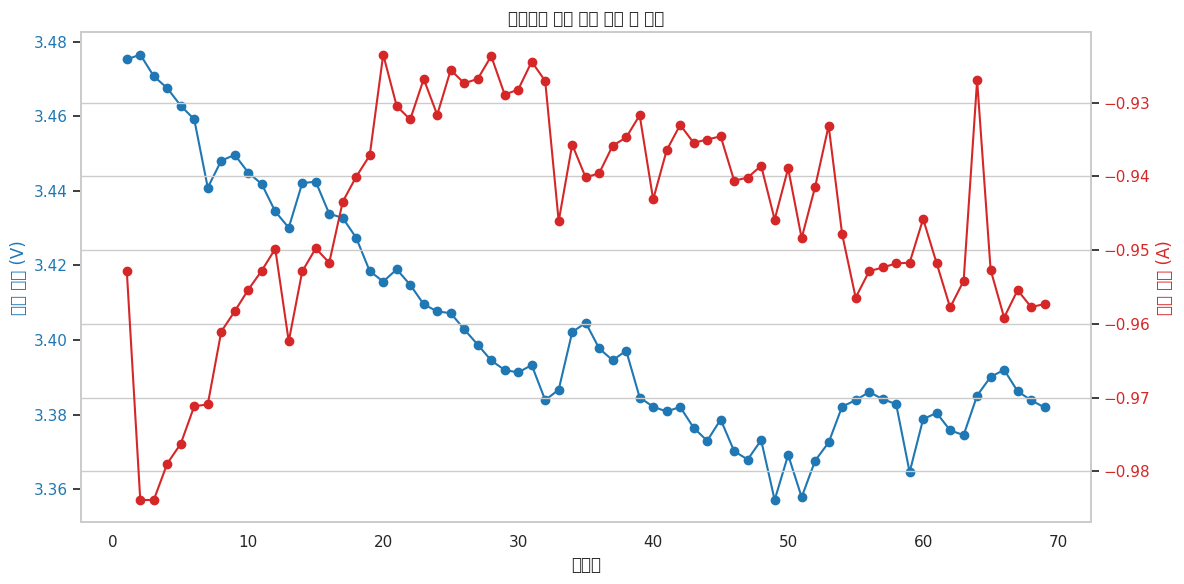

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# result_df가 이미 생성되었다고 가정합니다.

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 전압과 전류를 위한 두 개의 서브플롯을 가진 그림 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 평균 전압 플로팅
color = 'tab:blue'
ax1.set_xlabel('사이클')  # X축 레이블
ax1.set_ylabel('평균 전압 (V)', color=color)  # Y축 레이블
ax1.plot(result_df['Cycle'], result_df['voltage_mean'], color=color, marker='o', label='평균 전압')
ax1.tick_params(axis='y', labelcolor=color)

# 평균 전류를 위한 두 번째 Y축 생성
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('평균 전류 (A)', color=color)  # Y축 레이블
ax2.plot(result_df['Cycle'], result_df['current_mean'], color=color, marker='o', label='평균 전류')
ax2.tick_params(axis='y', labelcolor=color)

# 제목 및 그리드 추가
plt.title('사이클에 따른 평균 전압 및 전류')  # 그래프 제목
ax1.grid()

# 그래프 표시
plt.tight_layout()
plt.show()


#모델 설계

In [ ]:
import pandas as pd
import numpy as np

# CSV 파일 로드
file_path = '/content/B0005_dis.csv'  # 실제 파일 경로로 변경하세요
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열 추출
soh = df['SOH'].values  # 타겟 변수
time = df['Cycle'].values  # 입력 변수

# 데이터 정규화 (LSTM의 안정성을 위해)
time = (time - np.min(time)) / (np.max(time) - np.min(time))  # 0~1 사이로 스케일링
soh = soh / 100  # SOH를 0~1로 스케일링


In [ ]:
#LMSTM 모댈
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # 입력 시계열
        Y.append(target[i + time_steps])  # 대응되는 SOH
    return np.array(X), np.array(Y)


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분리 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# LSTM 모델 정의
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(100, activation='tanh', return_sequences=False),
        Dense(1, activation='linear')  # SOH 예측
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 모델 생성
model = create_lstm_model((time_steps, 1))  # 입력 데이터의 형태: (time_steps, features)

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=5,
    callbacks=[early_stopping]
)


Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3901 - mae: 0.5656 - val_loss: 0.0798 - val_mae: 0.2315
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0595 - mae: 0.1980 - val_loss: 0.0632 - val_mae: 0.2206
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0430 - mae: 0.1745 - val_loss: 0.0390 - val_mae: 0.1676
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0351 - mae: 0.1586 - val_loss: 0.0246 - val_mae: 0.1373
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0188 - mae: 0.1178 - val_loss: 0.0113 - val_mae: 0.0914
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0073 - mae: 0.0723 - val_loss: 0.0027 - val_mae: 0.0453
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - mae: 0.0381 - val_loss: 6.5794e-04 - val_mae: 0.0243
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5079e-04 - mae: 0.0132 - val_loss: 1.8586e-04 - val_mae: 0.0104
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.5463e-05 - mae: 0.0065
Validation Loss: 5.546330430661328e-05, Validation MAE: 0.00654236227273941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


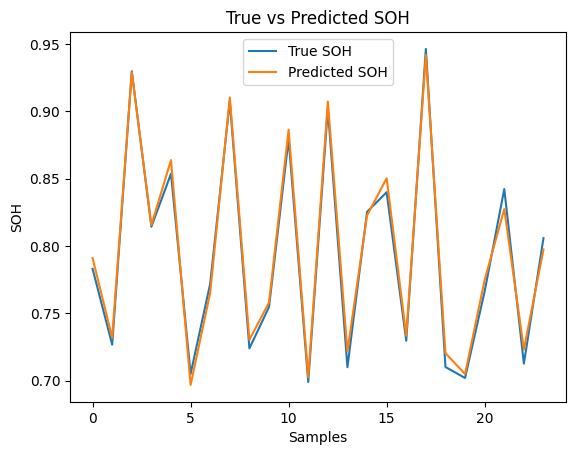

In [ ]:
# 테스트 데이터 준비 (선택 사항)
X_test, y_test = ..., ...  # 테스트 데이터 준비

# 모델 평가
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# 예측
y_pred = model.predict(X_val)

# 결과 시각화
import matplotlib.pyplot as plt

plt.plot(y_val, label='True SOH')
plt.plot(y_pred, label='Predicted SOH')
plt.xlabel('Samples')
plt.ylabel('SOH')
plt.title('True vs Predicted SOH')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = '/content/B0005_dis.csv'  # 실제 파일 경로로 변경하세요
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열 추출
soh = df['SOH'].values  # 타겟 변수
time = df['Cycle'].values  # 입력 변수

# 데이터 정규화 (LSTM의 안정성을 위해)
time = (time - np.min(time)) / (np.max(time) - np.min(time))  # 0~1 사이로 스케일링
soh = soh / 100  # SOH를 0~1로 스케일링


In [ ]:
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # 입력 시계열
        Y.append(target[i + time_steps])  # 대응되는 SOH
    return np.array(X), np.array(Y)

# 시계열 윈도우 크기
time_steps = 10  # 예: 10개의 시간 단계

# 시퀀스 데이터 생성
X, Y = create_sequences(time, soh, time_steps)

# X의 차원을 (samples, time_steps, features)로 변환
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# 데이터 분리 (80% 훈련, 20% 검증)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(100, activation='tanh', return_sequences=False),
        Dense(1, activation='linear')  # SOH 예측
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 모델 생성
model = create_lstm_model((time_steps, 1))  # 입력 데이터의 형태: (time_steps, features)


In [ ]:
# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=5,
    callbacks=[early_stopping]
)


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3606 - mae: 0.5433 - val_loss: 0.1210 - val_mae: 0.2909
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0841 - mae: 0.2400 - val_loss: 0.0854 - val_mae: 0.2519
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0535 - mae: 0.1841 - val_loss: 0.0046 - val_mae: 0.0555
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mae: 0.0334 - val_loss: 1.1887e-04 - val_mae: 0.0085
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2545e-04 - mae: 0.0160 - val_loss: 9.1438e-05 - val_mae: 0.0077
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9942e-04 - mae: 0.0135 - val_loss: 1.2508e-04 - val_mae: 0.0088
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1823e-04 - mae: 0.0115 - val_loss: 1.1034e-04 - val_mae: 0.0086
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1359e-04 - mae: 0.0142 - val_loss: 1.4752e-04 - val_mae: 0.0098
Epoch 9/200
26/26 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.1438e-05 - mae: 0.0077
Validation Loss: 9.14379779715091e-05, Validation MAE: 0.007706237956881523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


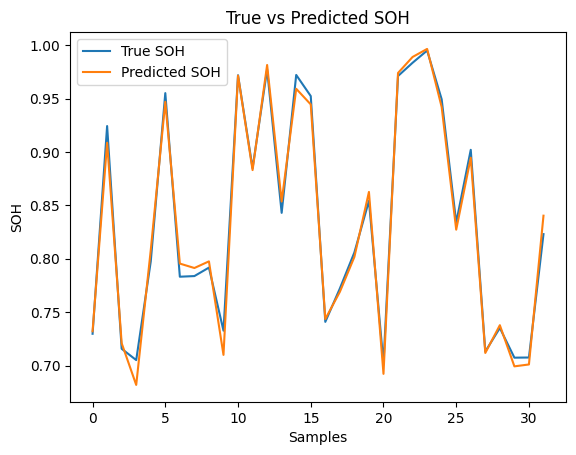

In [ ]:
# 모델 평가
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# 예측
y_pred = model.predict(X_val)

# 결과 시각화
plt.plot(y_val, label='True SOH')
plt.plot(y_pred, label='Predicted SOH')
plt.xlabel('Samples')
plt.ylabel('SOH')
plt.title('True vs Predicted SOH')
plt.legend()
plt.show()


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.4115 - mae: 0.5840 - val_loss: 0.1208 - val_mae: 0.2908
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1050 - mae: 0.2664 - val_loss: 0.0557 - val_mae: 0.2076
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mae: 0.1762 - val_loss: 0.0165 - val_mae: 0.1166
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mae: 0.0780 - val_loss: 3.7284e-04 - val_mae: 0.0158
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8735e-04 - mae: 0.0226 - val_loss: 1.2942e-04 - val_mae: 0.0096
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0400e-04 - mae: 0.0163 - val_loss: 2.6312e-04 - val_mae: 0.0136
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9646e-04 - mae: 0.0137 - val_loss: 1.0261e-04 - val_mae: 0.0081
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1137e-04 - mae: 0.0134 - val_loss: 2.8197e-04 - val_mae: 0.0139
Epoch 9/200
26/26 ━━━━━━━━━

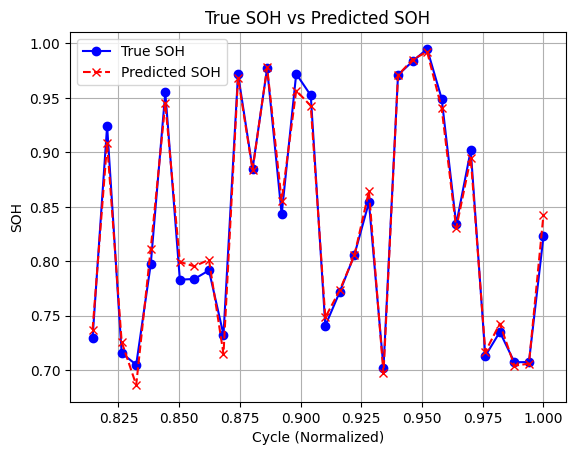

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# CSV 파일 로드
file_path = '/content/B0005_dis.csv'  # 실제 파일 경로로 변경하세요
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열 추출
soh = df['SOH'].values  # 타겟 변수
cycle = df['Cycle'].values  # 입력 변수

# 데이터 정규화 (LSTM의 안정성을 위해)
cycle = (cycle - np.min(cycle)) / (np.max(cycle) - np.min(cycle))  # 0~1 사이로 스케일링
soh = soh / 100  # SOH를 0~1로 스케일링

# 시계열 윈도우 크기
time_steps = 10  # 예: 10개의 시간 단계

# 시퀀스 데이터 생성
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # 입력 시계열
        Y.append(target[i + time_steps])  # 대응되는 SOH
    return np.array(X), np.array(Y)

X, Y = create_sequences(cycle, soh, time_steps)

# X의 차원을 (samples, time_steps, features)로 변환
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# 데이터 분리 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM 모델 정의
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(100, activation='tanh', return_sequences=False),
        Dense(1, activation='linear')  # SOH 예측
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 모델 생성
model = create_lstm_model((time_steps, 1))  # 입력 데이터의 형태: (time_steps, features)

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=5,
    callbacks=[early_stopping]
)

# 모델 평가
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# 예측
y_pred = model.predict(X_val)

# 실제 SOH와 예측 SOH를 시각화하기 위한 그래프
# 검증 데이터의 실제 'Cycle' 값 추출
val_cycle = cycle[-len(y_val):]

# 결과 시각화
plt.plot(val_cycle, y_val, label='True SOH', marker='o', linestyle='-', color='blue')
plt.plot(val_cycle, y_pred, label='Predicted SOH', marker='x', linestyle='--', color='red')

plt.xlabel('Cycle (Normalized)')  # X축: 정규화된 Cycle 값
plt.ylabel('SOH')  # Y축: SOH 값
plt.title('True SOH vs Predicted SOH')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.7954 - mae: 0.7688 - val_loss: 0.0178 - val_mae: 0.1074
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0427 - mae: 0.1252 - val_loss: 0.0047 - val_mae: 0.0428
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - mae: 0.0309 - val_loss: 2.4811e-04 - val_mae: 0.0120
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0603e-04 - mae: 0.0151 - val_loss: 2.7856e-04 - val_mae: 0.0129
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.9830e-04 - mae: 0.0101 - val_loss: 2.1657e-04 - val_mae: 0.0106
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4537e-04 - mae: 0.0087 - val_loss: 1.3673e-04 - val_mae: 0.0094
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2771e-04 - mae: 0.0084 - val_loss: 1.1719e-04 - val_mae: 0.0087
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1923e-04 - mae: 0.0080 - val_loss: 9.6796e-05 - val_mae: 0.0082
Epoch 9/200
26/26

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


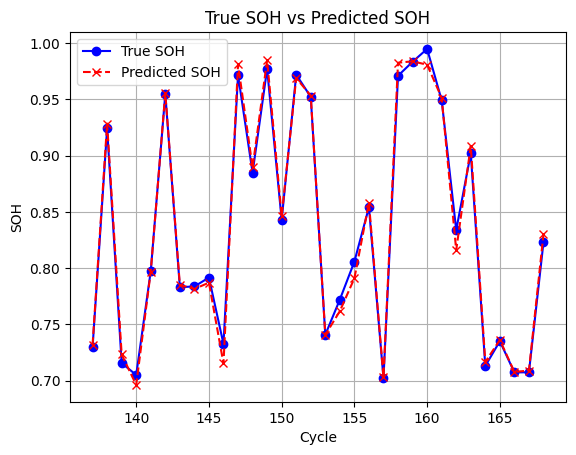

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# CSV 파일 로드
file_path = '/content/B0005_dis.csv'  # 실제 파일 경로로 변경하세요
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열 추출
soh = df['SOH'].values  # 타겟 변수
cycle = df['Cycle'].values  # 입력 변수

# 데이터 정규화 (LSTM의 안정성을 위해)
# cycle은 정규화하지 않고 그대로 사용
soh = soh / 100  # SOH를 0~1로 스케일링

# 시계열 윈도우 크기
time_steps = 10  # 예: 10개의 시간 단계

# 시퀀스 데이터 생성
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # 입력 시계열
        Y.append(target[i + time_steps])  # 대응되는 SOH
    return np.array(X), np.array(Y)

X, Y = create_sequences(cycle, soh, time_steps)

# X의 차원을 (samples, time_steps, features)로 변환
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# 데이터 분리 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM 모델 정의
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(100, activation='tanh', return_sequences=False),
        Dense(1, activation='linear')  # SOH 예측
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 모델 생성
model = create_lstm_model((time_steps, 1))  # 입력 데이터의 형태: (time_steps, features)

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=5,
    callbacks=[early_stopping]
)

# 모델 평가
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# 예측
y_pred = model.predict(X_val)

# 실제 SOH와 예측 SOH를 시각화하기 위한 그래프
# 검증 데이터의 실제 'Cycle' 값 추출 (정규화하지 않은 실제 Cycle 값)
val_cycle = cycle[-len(y_val):]  # Cycle 값은 1부터 168까지 사용

# 결과 시각화
plt.plot(val_cycle, y_val, label='True SOH', marker='o', linestyle='-', color='blue')
plt.plot(val_cycle, y_pred, label='Predicted SOH', marker='x', linestyle='--', color='red')

plt.xlabel('Cycle')  # X축: 실제 Cycle 값 (1~168)
plt.ylabel('SOH')  # Y축: SOH 값
plt.title('True SOH vs Predicted SOH')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0590 - mae: 0.1932 - val_loss: 0.0111 - val_mae: 0.0960
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mae: 0.0574 - val_loss: 9.7606e-04 - val_mae: 0.0261
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4689e-04 - mae: 0.0228 - val_loss: 6.2207e-04 - val_mae: 0.0219
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5130e-04 - mae: 0.0150 - val_loss: 2.4376e-04 - val_mae: 0.0123
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1962e-04 - mae: 0.0077 - val_loss: 1.1721e-04 - val_mae: 0.0093
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1382e-04 - mae: 0.0084 - val_loss: 1.1308e-04 - val_mae: 0.0080
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6430e-05 - mae: 0.0071 - val_loss: 9.8618e-05 - val_mae: 0.0088
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3545e-04 - mae: 0.0085 - val_loss: 6.1351e-05 - val_mae: 0.0058
Epoc

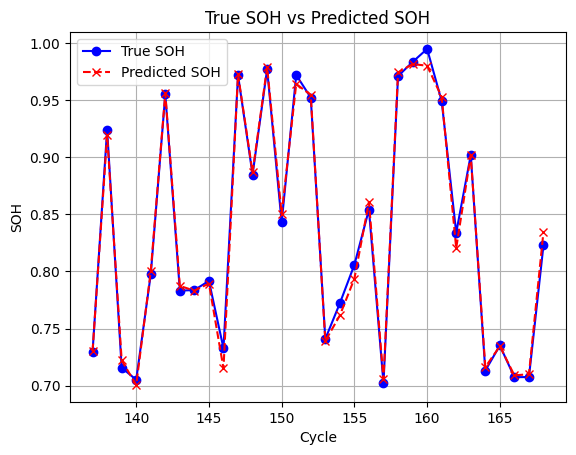

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# CSV 파일 로드
file_path = '/content/B0005_dis.csv'  # 실제 파일 경로로 변경하세요
df = pd.read_csv(file_path)

# 초기 용량을 첫 번째 사이클의 Capacity로 설정
initial_capacity = df['Capacity'].iloc[0]

# SOH 계산 (각 Cycle의 Capacity를 초기 용량에 대해 백분율로 계산)
df['SOH'] = (df['Capacity'] / initial_capacity) * 100

# 필요한 열 추출
soh = df['SOH'].values  # 타겟 변수
cycle = df['Cycle'].values  # 입력 변수

# 데이터 정규화 (LSTM의 안정성을 위해)
# cycle은 정규화하지 않고 그대로 사용
soh = soh / 100  # SOH를 0~1로 스케일링

# 시계열 윈도우 크기
time_steps = 10  # 예: 10개의 시간 단계

# 시퀀스 데이터 생성
def create_sequences(data, target, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])  # 입력 시계열
        Y.append(target[i + time_steps])  # 대응되는 SOH
    return np.array(X), np.array(Y)

X, Y = create_sequences(cycle, soh, time_steps)

# X의 차원을 (samples, time_steps, features)로 변환
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, time_steps, features)

# 데이터 분리 (80% 훈련, 20% 검증)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# RNN 모델 정의 (SimpleRNN을 사용)
def create_rnn_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        SimpleRNN(100, activation='tanh', return_sequences=False),  # RNN 대신 SimpleRNN 사용
        Dense(1, activation='linear')  # SOH 예측
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 모델 생성
model = create_rnn_model((time_steps, 1))  # 입력 데이터의 형태: (time_steps, features)

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=5,
    callbacks=[early_stopping]
)

# 모델 평가
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# 예측
y_pred = model.predict(X_val)

# 실제 SOH와 예측 SOH를 시각화하기 위한 그래프
# 검증 데이터의 실제 'Cycle' 값 추출 (정규화하지 않은 실제 Cycle 값)
val_cycle = cycle[-len(y_val):]  # Cycle 값은 1부터 168까지 사용

# 결과 시각화
plt.plot(val_cycle, y_val, label='True SOH', marker='o', linestyle='-', color='blue')
plt.plot(val_cycle, y_pred, label='Predicted SOH', marker='x', linestyle='--', color='red')

plt.xlabel('Cycle')  # X축: 실제 Cycle 값 (1~168)
plt.ylabel('SOH')  # Y축: SOH 값
plt.title('True SOH vs Predicted SOH')
plt.legend()
plt.grid(True)
plt.show()


＃예슥과 실체의 ＳＯＨ 차이를 시각화

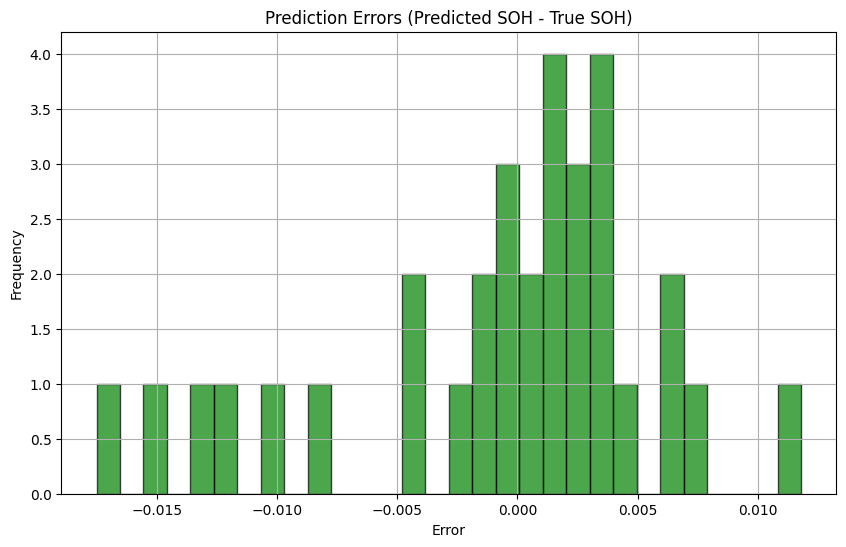

In [ ]:
# 예측값과 실제값의 차이를 계산
errors = y_pred.flatten() - y_val  # y_pred를 1차원으로 변환

# 차이의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Prediction Errors (Predicted SOH - True SOH)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

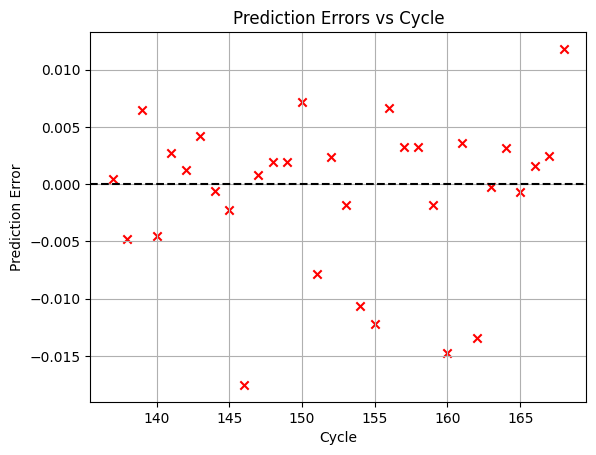

In [ ]:
# 잔차 (Residuals)를 시각화
plt.scatter(val_cycle, errors, color='red', marker='x')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Cycle')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors vs Cycle')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# MSE, RMSE, MAE 계산
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



MSE: 4.5375646784175905e-05
RMSE: 0.006736144801307044
MAE: 0.004934575744571578
